El proyecto actual se centra en una tarea de Clasificación de imagenes de radiografia de torax con el fin de identificar aquellos pacientes que tienen o no PNEUMONIA, para esto de utilizo una base de datos disponible en la plataforma KAGGLE, la cual fue subida a un droopbox para manejarla dentro del proyecto , LA METRICA MEDIANTE LA CUAL SE REALIZARA LA EVALUACIÓN SERA LA PRECISIÓN

# Se importan las librerias necesarias dentro del proyecto

In [1]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import imageio
import cv2 as cv2
import mlutils, pickle, bz2
import random
from mlutils import show_labeled_image_mosaic
from tensorflow.keras import backend as K
%matplotlib inline

/opt/miniconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Se realiza la lectura de los datos

Para realizar la lectura de los datos se llama a la terminal 

In [4]:
!wget -nc https://www.dropbox.com/s/rv86n597aqw2pau/chest-xray-pneumonia.zip?dl=0

--2019-04-21 20:38:04--  https://www.dropbox.com/s/rv86n597aqw2pau/chest-xray-pneumonia.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rv86n597aqw2pau/chest-xray-pneumonia.zip [following]
--2019-04-21 20:38:06--  https://www.dropbox.com/s/raw/rv86n597aqw2pau/chest-xray-pneumonia.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdfdb76589c521b7f773532da05.dl.dropboxusercontent.com/cd/0/inline/Affr26FqQZu7atW_CkWD6aPIvrMaxgAzwMyjLC2eRs0NgFquH7ndVkDNvk4E0XBkzY5qIMlFgzON1ywsiz45N81W6rsOFm8qoETP_SIhrqFXOg/file# [following]
--2019-04-21 20:38:06--  https://ucdfdb76589c521b7f773532da05.dl.dropboxusercontent.com/cd/0/inline/Affr26FqQZu7atW_CkWD6aPIvrMaxgAzwMyjLC2eRs0NgFquH7ndVkDNvk4E0XBkzY5qIMlFgzON1ywsiz45N81W6rsOFm

Una vez traidos los datos se realiza el correspondiente unzip de la carpeta

In [5]:
!unzip chest-xray-pneumonia.zip?dl=0

Archive:  chest-xray-pneumonia.zip?dl=0
  inflating: chest_xray.zip          


Dentro de la carpeta descropimida anteriormente se encuentra el zip X_chest_ray , razón por la cual se realiza una nueva descompresión para tener acceso a las carpetas que se encuentran dentro

In [6]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM

  inflating: chest_xray/test/PNEUMONIA/person22_virus_54.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person22_virus_54.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person120_bacteria_570.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person120_bacteria_570.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person134_bacteria_641.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person134_bacteria_641.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person44_virus_94.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person44_virus_94.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person138_bacteria_658.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person138_bacteria_658.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1610_virus_2793.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1610_virus_2793.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person92_bacteria_451.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person92_b

  inflating: chest_xray/test/PNEUMONIA/person159_bacteria_746.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person159_bacteria_746.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1640_virus_2839.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1640_virus_2839.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person139_bacteria_665.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person139_bacteria_665.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person53_virus_107.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person53_virus_107.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person19_virus_50.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person19_virus_50.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person130_bacteria_627.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person130_bacteria_627.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person152_bacteria_722.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1

  inflating: chest_xray/test/PNEUMONIA/person121_bacteria_579.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person121_bacteria_579.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1649_virus_2850.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1649_virus_2850.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person133_bacteria_638.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person133_bacteria_638.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_387.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_387.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person158_bacteria_745.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person158_bacteria_745.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person141_bacteria_677.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person141_bacteria_677.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person121_bacteria_580.jpeg  
  inflating: __MACOSX/chest_xray/test/PNE

  inflating: chest_xray/test/PNEUMONIA/person1619_virus_2806.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1619_virus_2806.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1643_virus_2843.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1643_virus_2843.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person96_bacteria_464.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person96_bacteria_464.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person90_bacteria_443.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person90_bacteria_443.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person114_bacteria_544.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person114_bacteria_544.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1685_virus_2903.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1685_virus_2903.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person150_bacteria_716.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA

  inflating: chest_xray/test/NORMAL/IM-0037-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0037-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0326-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0326-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0110-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0084-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0084-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0059-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0059-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0332-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0332-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0274-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0274-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0023-0001.jpeg  
  inflating: __MACO

  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0135-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0303-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0303-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0073-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0049-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0049-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0322-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0322-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0052-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0033-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0033-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0028-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0

  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0361-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0361-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0011-0001-0002.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0070-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0070-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0294-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0294-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0340-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0340-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0206-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0206-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0030-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0030-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0103-0001.

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person162_virus_319.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person82_virus_154.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person82_virus_154.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1253_bacteria_3211.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1253_bacteria_3211.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1395_virus_2398.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1395_virus_2398.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person496_bacteria_2095.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person496_bacteria_2095.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person53_bacteria_254.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person53_bacteria_254.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person74_bacteria_362.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person74_bacteria_362.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/train/PNEUMONIA/person1308_bacteria_3285.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1308_bacteria_3285.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1424_bacteria_3651.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1424_bacteria_3651.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person395_bacteria_1795.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person395_bacteria_1795.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1375_virus_2366.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1375_virus_2366.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person339_virus_695.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person339_virus_695.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person516_bacteria_2191.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person516_bacteria_2191.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person991_virus_1669.jpeg  
  inflating: __MACOSX/

  inflating: chest_xray/train/PNEUMONIA/person596_virus_1149.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person596_virus_1149.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1459_bacteria_3797.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1459_bacteria_3797.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1031_bacteria_2963.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1031_bacteria_2963.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person460_virus_948.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person460_virus_948.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1850_bacteria_4721.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1850_bacteria_4721.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1238.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person266_bacteria_1238.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person333_bacteria_1540.jpeg  
  inflating: __MACO

  inflating: chest_xray/train/PNEUMONIA/person1539_bacteria_4022.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1539_bacteria_4022.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1839_bacteria_4705.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1839_bacteria_4705.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_bacteria_1417.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person299_bacteria_1417.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1535_bacteria_4017.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1535_bacteria_4017.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3945.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1507_bacteria_3945.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1429_bacteria_3688.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1429_bacteria_3688.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1568_virus_2723.jpeg  
  i

  inflating: chest_xray/train/PNEUMONIA/person1557_bacteria_4063.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1557_bacteria_4063.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1512_virus_2631.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1512_virus_2631.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person292_virus_602.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person292_virus_602.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person507_virus_1019.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person507_virus_1019.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person891_virus_1541.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person891_virus_1541.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person573_virus_1116.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person573_virus_1116.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1147_virus_1917.jpeg  
  inflating: __MACOSX/chest_xray/train/PN

  inflating: chest_xray/train/PNEUMONIA/person488_bacteria_2061.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person488_bacteria_2061.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person447_virus_921_1.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person447_virus_921_1.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person332_bacteria_1538.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person332_bacteria_1538.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1265_virus_2156.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1265_virus_2156.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1790_bacteria_4638.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1790_bacteria_4638.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1119_virus_1844.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1119_virus_1844.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person258_bacteria_1215.jpeg  
  inflating: __MACOSX

  inflating: chest_xray/train/PNEUMONIA/person583_bacteria_2406.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person583_bacteria_2406.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_bacteria_2257.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person536_bacteria_2257.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person307_virus_629.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person307_virus_629.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person846_bacteria_2766.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person846_bacteria_2766.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person30_bacteria_147.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person30_bacteria_147.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person20_bacteria_70.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person20_bacteria_70.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person441_bacteria_1911.jpeg  
  inflating: __MACOSX/chest_x

  inflating: chest_xray/train/PNEUMONIA/person366_virus_746.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person366_virus_746.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person7_bacteria_28.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person7_bacteria_28.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person978_virus_1653.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person978_virus_1653.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1737_bacteria_4573.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1737_bacteria_4573.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1451_virus_2479.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1451_virus_2479.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person326_bacteria_1506.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person326_bacteria_1506.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_bacteria_1691.jpeg  
  inflating: __MACOSX/chest_xray/tr

  inflating: chest_xray/train/PNEUMONIA/person1026_virus_1718.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1026_virus_1718.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person927_virus_1584.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person927_virus_1584.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1451_virus_2480.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1451_virus_2480.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person689_bacteria_2586.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person689_bacteria_2586.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1531_virus_2666.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1531_virus_2666.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person736_bacteria_2639.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person736_bacteria_2639.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1490_bacteria_3891.jpeg  
  inflating: __MACOSX/chest_

  inflating: chest_xray/train/PNEUMONIA/person399_bacteria_1806.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person399_bacteria_1806.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person431_virus_880.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person431_virus_880.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1945_bacteria_4872.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1945_bacteria_4872.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person341_virus_699.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person341_virus_699.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person734_bacteria_2637.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person734_bacteria_2637.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person339_bacteria_1573.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person339_bacteria_1573.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1551_bacteria_4053.jpeg  
  inflating: __MACOSX/ch

  inflating: chest_xray/train/PNEUMONIA/person1310_bacteria_3304.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1310_bacteria_3304.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1546_virus_2687.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1546_virus_2687.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person23_bacteria_90.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_90.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1380.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1380.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person671_bacteria_2564.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person671_bacteria_2564.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person281_bacteria_1324.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person281_bacteria_1324.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1497.jpeg  
  inflating: __MACO

  inflating: chest_xray/train/PNEUMONIA/person508_bacteria_2144.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person508_bacteria_2144.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person912_bacteria_2837.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person912_bacteria_2837.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person831_bacteria_2742.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person831_bacteria_2742.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person326_virus_670.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person326_virus_670.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person377_virus_760.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person377_virus_760.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1308_bacteria_3292.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1308_bacteria_3292.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1055_bacteria_2989.jpeg  
  inflating: __MACOSX/ch

  inflating: chest_xray/train/PNEUMONIA/person1247_bacteria_3203.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1247_bacteria_3203.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person832_bacteria_2743.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person832_bacteria_2743.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1544_bacteria_4038.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1544_bacteria_4038.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1183_bacteria_3131.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1183_bacteria_3131.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1251_bacteria_3208.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1251_bacteria_3208.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1226_virus_2077.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1226_virus_2077.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person526_bacteria_2221.jpeg  
  infla

  inflating: chest_xray/train/PNEUMONIA/person82_virus_155.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person82_virus_155.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person480_virus_981.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person480_virus_981.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1181_bacteria_3129.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1181_bacteria_3129.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person990_bacteria_2917.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person990_bacteria_2917.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3948.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1507_bacteria_3948.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person53_bacteria_255.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person53_bacteria_255.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person533_bacteria_2250.jpeg  
  inflating: __MACOSX/chest_x

  inflating: chest_xray/train/PNEUMONIA/person258_virus_539.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person258_virus_539.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person918_bacteria_2843.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person918_bacteria_2843.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1702_bacteria_4509.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1702_bacteria_4509.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1261_bacteria_3219.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1261_bacteria_3219.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1455_bacteria_3784.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1455_bacteria_3784.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1368_virus_2352.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1368_virus_2352.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person447_virus_921.jpeg  
  inflating: __MACOSX

  inflating: chest_xray/train/PNEUMONIA/person1077_virus_1787.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1077_virus_1787.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1085_bacteria_3025.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1085_bacteria_3025.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person23_bacteria_81.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_81.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1728_bacteria_4556.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1728_bacteria_4556.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person446_virus_920.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person446_virus_920.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1096_virus_1816.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1096_virus_1816.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person581_virus_1125.jpeg  
  inflating: __MACOSX/chest_xray

  inflating: chest_xray/train/PNEUMONIA/person820_bacteria_2731.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person820_bacteria_2731.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1611_bacteria_4241.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1611_bacteria_4241.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1619_bacteria_4267.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1619_bacteria_4267.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person635_bacteria_2526.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person635_bacteria_2526.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person589_bacteria_2424.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person589_bacteria_2424.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person534_bacteria_2253.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person534_bacteria_2253.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1850.jpeg  
  infla

  inflating: chest_xray/train/PNEUMONIA/person1263_bacteria_3221.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1263_bacteria_3221.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person747_virus_1370.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person747_virus_1370.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person275_bacteria_1291.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person275_bacteria_1291.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person500_bacteria_2108.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person500_bacteria_2108.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person442_virus_906.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person442_virus_906.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person662_bacteria_2554.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person662_bacteria_2554.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person463_virus_952.jpeg  
  inflating: __MACOSX/chest

  inflating: chest_xray/train/PNEUMONIA/person19_bacteria_59.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person19_bacteria_59.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1597_bacteria_4189.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1597_bacteria_4189.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person524_virus_1045.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person524_virus_1045.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1227_bacteria_3182.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1227_bacteria_3182.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1019_virus_1707.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1019_virus_1707.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person702_bacteria_2601.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person702_bacteria_2601.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person432_virus_881.jpeg  
  inflating: __MACOSX/chest

  inflating: chest_xray/train/PNEUMONIA/person308_bacteria_1445.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person308_bacteria_1445.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person258_bacteria_1209.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person258_bacteria_1209.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1425_virus_2438.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1425_virus_2438.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1480_bacteria_3859.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1480_bacteria_3859.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person803_bacteria_2710.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person803_bacteria_2710.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person498_bacteria_2102.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person498_bacteria_2102.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1223_virus_2073.jpeg  
  inflating: __

  inflating: chest_xray/train/PNEUMONIA/person510_bacteria_2148.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person510_bacteria_2148.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person313_bacteria_1459.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person313_bacteria_1459.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person491_virus_997.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person491_virus_997.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person58_bacteria_276.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person58_bacteria_276.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person513_virus_1030.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person513_virus_1030.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1649_bacteria_4379.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1649_bacteria_4379.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person755_virus_1380.jpeg  
  inflating: __MACOSX/chest_xr

  inflating: chest_xray/train/PNEUMONIA/person1058_virus_1757.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1058_virus_1757.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person773_virus_1402.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person773_virus_1402.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1474_bacteria_3837.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1474_bacteria_3837.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1266_virus_2158.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1266_virus_2158.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person53_bacteria_253.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person53_bacteria_253.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person348_virus_714.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person348_virus_714.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1196_bacteria_3146.jpeg  
  inflating: __MACOSX/chest_xray/t

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person722_virus_1341.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person267_bacteria_1251.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person267_bacteria_1251.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_virus_875.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person427_virus_875.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person720_bacteria_2622.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person720_bacteria_2622.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person688_virus_1282.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person688_virus_1282.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person31_bacteria_161.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person31_bacteria_161.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1906_bacteria_4803.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1906_bacteria_4803.jpeg  
  inflating: chest_

  inflating: chest_xray/train/PNEUMONIA/person343_virus_704.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person343_virus_704.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1922_bacteria_4830.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1922_bacteria_4830.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1638_bacteria_4341.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1638_bacteria_4341.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person864_virus_1509.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person864_virus_1509.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person430_bacteria_1871.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person430_bacteria_1871.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person863_virus_1508.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person863_virus_1508.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1600_bacteria_4202.jpeg  
  inflating: __MACOSX/ches

  inflating: chest_xray/train/PNEUMONIA/person1033_bacteria_2966.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1033_bacteria_2966.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person575_bacteria_2374.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person575_bacteria_2374.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person571_bacteria_2367.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person571_bacteria_2367.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1141_virus_1890.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1141_virus_1890.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person279_bacteria_1315.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person279_bacteria_1315.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person878_virus_1526.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person878_virus_1526.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person486_virus_990.jpeg  
  inflating: __MACOSX/c

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1436_bacteria_3712.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person558_virus_1098.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person558_virus_1098.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person640_virus_1221.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person640_virus_1221.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1048_virus_1744.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1048_virus_1744.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1519_virus_2646.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1519_virus_2646.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person663_bacteria_2555.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person663_bacteria_2555.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1262_bacteria_3220.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1262_bacteria_3220.jpeg  
  inflating: ches

  inflating: chest_xray/train/PNEUMONIA/person402_virus_799.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person402_virus_799.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1247_virus_2115.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1247_virus_2115.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1029_bacteria_2961.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1029_bacteria_2961.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1430_virus_2444.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1430_virus_2444.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person23_bacteria_83.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_83.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person576_bacteria_2376.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person576_bacteria_2376.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1296_virus_2224.jpeg  
  inflating: __MACOSX/chest_xray/

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person128_virus_261.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person277_bacteria_1301.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person277_bacteria_1301.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person703_virus_1300.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person703_virus_1300.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person454_virus_938.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person454_virus_938.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person101_virus_188.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person101_virus_188.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1345_virus_2321.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1345_virus_2321.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person643_bacteria_2534.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person643_bacteria_2534.jpeg  
  inflating: chest_xray/train/

  inflating: chest_xray/train/PNEUMONIA/person1486_bacteria_3885.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1486_bacteria_3885.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_bacteria_3746.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1449_bacteria_3746.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person584_virus_1128.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person584_virus_1128.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person337_bacteria_1557.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person337_bacteria_1557.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person88_virus_161.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person88_virus_161.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person255_bacteria_1175.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person255_bacteria_1175.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person498_bacteria_2100.jpeg  
  inflating: __MACOSX/c

  inflating: chest_xray/train/PNEUMONIA/person1417_bacteria_3635.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1417_bacteria_3635.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person534_virus_1061.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person534_virus_1061.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1174_virus_1980.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1174_virus_1980.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1521_virus_2649.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1521_virus_2649.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person351_bacteria_1619.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person351_bacteria_1619.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1475_virus_2558.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1475_virus_2558.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1670_bacteria_4430.jpeg  
  inflating: __MACOSX/ches

  inflating: chest_xray/train/PNEUMONIA/person531_bacteria_2236.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person531_bacteria_2236.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1402_virus_2405.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1402_virus_2405.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person429_virus_877.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person429_virus_877.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1321_bacteria_3359.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1321_bacteria_3359.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1355_bacteria_3449.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1355_bacteria_3449.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_virus_753.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person370_virus_753.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person544_virus_1078.jpeg  
  inflating: __MACOSX/chest_xr

  inflating: chest_xray/train/PNEUMONIA/person522_virus_1041.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person522_virus_1041.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person257_bacteria_1194.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person257_bacteria_1194.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1105_bacteria_3046.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1105_bacteria_3046.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1247.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person266_bacteria_1247.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person662_virus_1246.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person662_virus_1246.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person725_bacteria_2627.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person725_bacteria_2627.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1582_bacteria_4142.jpeg  
  inflating: __MACOS

  inflating: chest_xray/train/PNEUMONIA/person842_virus_1483.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person842_virus_1483.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1233.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person264_bacteria_1233.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1718_bacteria_4538.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1718_bacteria_4538.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1470_bacteria_3830.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1470_bacteria_3830.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person59_bacteria_280.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person59_bacteria_280.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1403_bacteria_3559.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1403_bacteria_3559.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person19_bacteria_60.jpeg  
  inflating: __MAC

  inflating: chest_xray/train/PNEUMONIA/person1345_bacteria_3425.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1345_bacteria_3425.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1366_bacteria_3490.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1366_bacteria_3490.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1399_virus_2402.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1399_virus_2402.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person442_virus_905.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person442_virus_905.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1192_bacteria_3141.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1192_bacteria_3141.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1162_bacteria_3107.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1162_bacteria_3107.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person728_bacteria_2630.jpeg  
  inflating: __

  inflating: chest_xray/train/PNEUMONIA/person598_virus_1151.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person598_virus_1151.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_173.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person33_bacteria_173.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person670_bacteria_2563.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person670_bacteria_2563.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person382_bacteria_1741.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person382_bacteria_1741.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1151_virus_1928.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1151_virus_1928.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person499_virus_1008.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person499_virus_1008.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person415_bacteria_1838.jpeg  
  inflating: __MACOSX/chest_xra

  inflating: chest_xray/train/PNEUMONIA/person1150_bacteria_3095.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1150_bacteria_3095.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1761_bacteria_4603.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1761_bacteria_4603.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1564_virus_2719.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1564_virus_2719.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person670_virus_1259.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person670_virus_1259.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person25_bacteria_120.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person25_bacteria_120.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person637_virus_1218.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person637_virus_1218.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person124_virus_246.jpeg  
  inflating: __MACOSX/chest_xra

  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1229.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person264_bacteria_1229.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person305_virus_627.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person305_virus_627.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1120_virus_1845.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1120_virus_1845.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1640_bacteria_4348.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1640_bacteria_4348.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1243_virus_2110.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1243_virus_2110.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person749_virus_1374.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person749_virus_1374.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person25_bacteria_116.jpeg  
  inflating: __MACOSX/chest_xray/

  inflating: chest_xray/train/PNEUMONIA/person1212_bacteria_3164.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1212_bacteria_3164.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1506_virus_2616.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1506_virus_2616.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1581_bacteria_4135.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1581_bacteria_4135.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1649_bacteria_4377.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1649_bacteria_4377.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person58_bacteria_278.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person58_bacteria_278.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person391_virus_781.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person391_virus_781.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person564_bacteria_2343.jpeg  
  inflating: __MACOSX

  inflating: chest_xray/train/PNEUMONIA/person28_bacteria_143.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person28_bacteria_143.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_302.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_302.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1929_bacteria_4839.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1929_bacteria_4839.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1015_virus_1701.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1015_virus_1701.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person925_virus_1582.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person925_virus_1582.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person687_bacteria_2583.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person687_bacteria_2583.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1644_bacteria_4361.jpeg  
  inflating: __MACOSX/ches

  inflating: chest_xray/train/PNEUMONIA/person840_bacteria_2759.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person840_bacteria_2759.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1924_bacteria_4832.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1924_bacteria_4832.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1426_bacteria_3667.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1426_bacteria_3667.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1197_virus_2039.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1197_virus_2039.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1940_bacteria_4861.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1940_bacteria_4861.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person536_virus_1065.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person536_virus_1065.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1701.jpeg  
  inflating: __

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person306_bacteria_1440.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person382_bacteria_1746.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person382_bacteria_1746.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_174.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person33_bacteria_174.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1180_virus_2008.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1180_virus_2008.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person255_bacteria_1165.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person255_bacteria_1165.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person403_virus_803.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person403_virus_803.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1447_bacteria_3741.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1447_bacteria_3741.jpeg  
  inflating: c

  inflating: chest_xray/train/PNEUMONIA/person1147_virus_1919.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1147_virus_1919.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person849_bacteria_2770.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person849_bacteria_2770.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person585_virus_1129.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person585_virus_1129.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person508_virus_1021.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person508_virus_1021.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person569_bacteria_2364.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person569_bacteria_2364.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1219_bacteria_3172.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1219_bacteria_3172.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person448_bacteria_1936.jpeg  
  inflating: __MACOSX/che

  inflating: chest_xray/train/PNEUMONIA/person1234_virus_2093.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1234_virus_2093.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_bacteria_1498.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person325_bacteria_1498.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person383_bacteria_1749.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person383_bacteria_1749.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_virus_754.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person371_virus_754.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person648_virus_1230.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person648_virus_1230.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person760_virus_1388.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person760_virus_1388.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person413_bacteria_1834.jpeg  
  inflating: __MACOSX/chest_xray/tr

  inflating: chest_xray/train/PNEUMONIA/person967_virus_1640.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person967_virus_1640.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1344_bacteria_3421.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1344_bacteria_3421.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1908_bacteria_4811.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1908_bacteria_4811.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person972_bacteria_2897.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person972_bacteria_2897.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1617_bacteria_4254.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1617_bacteria_4254.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1613_bacteria_4247.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1613_bacteria_4247.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1063_bacteria_2997.jpeg  
  inflat

  inflating: chest_xray/train/PNEUMONIA/person1409_bacteria_3583.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1409_bacteria_3583.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person710_bacteria_2611.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person710_bacteria_2611.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person727_virus_1347.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person727_virus_1347.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1866.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person427_bacteria_1866.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1414_bacteria_3628.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1414_bacteria_3628.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_2003.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person470_bacteria_2003.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person615_virus_1184.jpeg  
  inflating: __M

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person292_virus_600.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person522_bacteria_2211.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person522_bacteria_2211.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person527_virus_1048.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person527_virus_1048.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person379_virus_762.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person379_virus_762.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person502_bacteria_2122.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person502_bacteria_2122.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1433_virus_2447.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1433_virus_2447.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person401_virus_795.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person401_virus_795.jpeg  
  inflating: chest_xray/train/

  inflating: chest_xray/train/PNEUMONIA/person1507_bacteria_3947.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1507_bacteria_3947.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person269_virus_554.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person269_virus_554.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person774_bacteria_2678.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person774_bacteria_2678.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person465_virus_957.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person465_virus_957.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person294_bacteria_1383.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person294_bacteria_1383.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person23_bacteria_93.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person23_bacteria_93.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person791_virus_1422.jpeg  
  inflating: __MACOSX/chest_xray/t

  inflating: chest_xray/train/PNEUMONIA/person759_bacteria_2663.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person759_bacteria_2663.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1246_bacteria_3202.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1246_bacteria_3202.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1258_virus_2138.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1258_virus_2138.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1406_bacteria_3575.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1406_bacteria_3575.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1863_bacteria_4735.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1863_bacteria_4735.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1074_bacteria_3012.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1074_bacteria_3012.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person259_bacteria_1219.jpeg  
  infla

  inflating: chest_xray/train/PNEUMONIA/person788_virus_1419.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person788_virus_1419.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1904_bacteria_4798.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1904_bacteria_4798.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person706_virus_1304.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person706_virus_1304.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1537_bacteria_4020.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1537_bacteria_4020.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1537_virus_2674.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1537_virus_2674.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person723_virus_1342.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person723_virus_1342.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person522_bacteria_2210.jpeg  
  inflating: __MACOSX/chest_x

  inflating: chest_xray/train/PNEUMONIA/person535_bacteria_2255.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person535_bacteria_2255.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person588_bacteria_2422.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person588_bacteria_2422.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person429_bacteria_1870.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person429_bacteria_1870.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person600_bacteria_2456.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person600_bacteria_2456.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person632_virus_1211.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person632_virus_1211.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person258_bacteria_1216.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person258_bacteria_1216.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2189.jpeg  
  inflating: __MA

  inflating: chest_xray/train/PNEUMONIA/person487_bacteria_2056.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person487_bacteria_2056.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person461_virus_950.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person461_virus_950.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1009_virus_1694.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1009_virus_1694.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1156_virus_1935.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1156_virus_1935.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1529_virus_2663.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1529_virus_2663.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person441_bacteria_1912.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person441_bacteria_1912.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1236_bacteria_3192.jpeg  
  inflating: __MACOSX/chest_xr

  inflating: chest_xray/train/PNEUMONIA/person1023_bacteria_2954.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1023_bacteria_2954.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person928_virus_1586.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person928_virus_1586.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1777_bacteria_4622.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1777_bacteria_4622.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person811_bacteria_2721.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person811_bacteria_2721.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person652_virus_1234.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person652_virus_1234.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1218_virus_2066.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1218_virus_2066.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person776_virus_1405.jpeg  
  inflating: __MACOSX/ches

  inflating: chest_xray/train/PNEUMONIA/person1818_bacteria_4676.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1818_bacteria_4676.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person562_virus_1102.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person562_virus_1102.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person487_bacteria_2060.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person487_bacteria_2060.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person274_virus_563.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person274_virus_563.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_virus_1000.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person494_virus_1000.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1371_virus_2361.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1371_virus_2361.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person553_bacteria_2316.jpeg  
  inflating: __MACOSX/chest_xray/

  inflating: chest_xray/train/PNEUMONIA/person1333_bacteria_3385.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1333_bacteria_3385.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1081_virus_1793.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1081_virus_1793.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person717_bacteria_2618.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person717_bacteria_2618.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1454_bacteria_3782.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1454_bacteria_3782.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person925_bacteria_2850.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person925_bacteria_2850.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1404_bacteria_3561.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1404_bacteria_3561.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person20_bacteria_69.jpeg  
  inflating:

  inflating: chest_xray/train/PNEUMONIA/person520_bacteria_2204.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person520_bacteria_2204.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person621_virus_1195.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person621_virus_1195.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person421_virus_866.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person421_virus_866.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person132_virus_266.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person132_virus_266.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person66_bacteria_325.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person66_bacteria_325.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person88_virus_166.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person88_virus_166.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person142_virus_288.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._

  inflating: chest_xray/train/NORMAL/IM-0718-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0718-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0645-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0645-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0473-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0473-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0535-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0535-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0554-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0554-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0467-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0467-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1125-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1125-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0545-0001-0

  inflating: chest_xray/train/NORMAL/IM-0672-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0672-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0620-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0620-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0425-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0425-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0563-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0563-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1086-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1086-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1279-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1279-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0608-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0608-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0578-0001.j

  inflating: chest_xray/train/NORMAL/IM-0234-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0234-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0372-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0372-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0691-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0691-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0658-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0658-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0705-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0705-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0828-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0828-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0533-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0533-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0643-0001.jpeg  
  inflating:

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0986-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0986-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0454-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0454-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0662-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0662-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0896-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0896-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0772-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0772-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0919-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0919-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0402-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0402-0001.jpeg  
  inflating: 

  inflating: chest_xray/train/NORMAL/IM-0456-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0456-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0491-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0491-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0810-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0810-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0956-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0956-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0330-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0330-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1094-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1094-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0276-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0276-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0437-0001.jpeg  
  

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0926-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0926-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0618-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0618-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0560-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0560-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1111-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1111-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1327-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1327-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1261-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1261-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0392-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0392-0001.jpeg  
  inflating: chest_xray/train/NORMA

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0587-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0587-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0855-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0668-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0668-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0945-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0497-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0497-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0518-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0518-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0803-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0803-0001.jpeg  
  inflating: 

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0539-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0539-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0519-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0519-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0666-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0666-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0652-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0652-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1223-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1223-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0187-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0187-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0464-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0464-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1015-0001.jpeg  
  inflat

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1273-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1273-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0602-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0602-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0587-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0587-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0505-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0505-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1045-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1045-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0434-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0434-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0569-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORM

  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0918-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0403-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0403-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0635-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0635-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0545-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0545-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0660-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0660-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0897-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0897-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1296-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1296-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0304-0001.jpeg  
  inflating: __MACOSX/chest

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1194-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1194-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0230-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0230-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0856-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0856-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1128-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1128-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0910-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0910-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1127-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1127-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0556-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0556-0001.jpeg  
  inflating: chest_xray/train/NORMA

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0450-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0666-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0666-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0385-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0385-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0516-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0516-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0357-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0357-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0482-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0482-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0211-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0211-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0877-0001.jpe

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1234-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1144-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1144-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0535-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0535-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0703-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0703-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0229-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0229-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0505-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0505-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0575-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0575-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0587-0001-0001.jpeg

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1264-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1264-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0615-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0615-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0781-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0781-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0865-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0865-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0511-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0511-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0923-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0923-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0937-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0937-0001.jpeg  
  inflating: chest_xray/train/NORMA

  inflating: chest_xray/train/NORMAL/IM-0128-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0128-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1073-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1073-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0596-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0596-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0419-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0419-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0812-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0812-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0509-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0509-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0486-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0486-0001.jpeg  
  inflating: chest_xray/train

  inflating: chest_xray/train/NORMAL/IM-0527-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0527-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0961-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0961-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1277-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1277-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0827-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0827-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0528-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0528-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0833-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0833-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0975-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0975-0001.jpeg  
  inflating: chest_

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0911-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0911-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0499-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0499-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0857-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0857-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0585-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0585-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0411-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0411-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0501-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0501-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1060-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1060-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0413-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0413-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0908-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0908-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0608-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0608-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0887-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0887-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0555-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0555-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0408-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0408-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0122-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0122-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0314-0001.j

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1328-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1328-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0395-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0395-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0815-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0815-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0448-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0481-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0481-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0209-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0209-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0515-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0515-0001.jpeg  
  inflating: chest_xray/train/NORMA

  inflating: chest_xray/train/NORMAL/IM-0129-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0129-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0403-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0403-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1302-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1302-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0290-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0290-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1134-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1134-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0545-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0545-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0418-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0418-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0903-0001.jpeg  
  inflating:

  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0569-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0333-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0333-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0619-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0619-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1116-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1116-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1103-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1103-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1269-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1269-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0690-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0690-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0659-0001.jpeg  
  inflating: __MACOSX/c

  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg  
   creating: __MACOSX/chest_xray/val/NORMAL/
  inflating: __MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1440-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg  
  inflating: __MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1437-0001.jpeg  
  inflating: chest_xray/val/NORMAL/.DS_Store  
  inflating: __MACOSX/chest_xray/val/NORMAL/._.DS_Store  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg  
  inflating: __MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1431-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg  
  inflating: __MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1436-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg  
  inflating: __MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1430-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg  
  inflating: __MACOSX/chest_xray/val/NORMAL/._NORMAL2-IM-1438-0001.jpeg  
  inflating: chest_xray/val/

Se observan las carpetas que hay dentro del archivo, este se divide en train y test, acontinuación se observa lo contenido dentro de la carpeta "Train"

In [7]:
!ls -lash chest_xray/train

total 312K
4.0K drwxr-xr-x 4 user user 4.0K Mar 21  2018 .
4.0K drwxr-xr-x 5 user user 4.0K Mar 21  2018 ..
 16K -rw-r--r-- 1 user user  15K Mar 21  2018 .DS_Store
 72K drwxr-xr-x 2 user user  68K Mar 21  2018 NORMAL
216K drwxr-xr-x 2 user user 212K Mar 21  2018 PNEUMONIA


Se realiza la lectura de las imagenes y se conforman las variables Train y Test que seran tratadas posteriormente

In [8]:
import os
from skimage.color import rgb2gray,gray2rgb
contenido=os.listdir("chest_xray")
contenido_iNT=os.listdir("chest_xray/train/NORMAL")
contenido_iNTE=os.listdir("chest_xray/test/NORMAL")
contenido_iPT=os.listdir("chest_xray/train/PNEUMONIA")
contenido_iPTE=os.listdir("chest_xray/test/PNEUMONIA")
Train=[]
Test=[]
for stage in contenido[0],contenido[3]:
    if stage == contenido[3]:
        for Archivo in contenido_iNT:
            if Archivo !=  '.DS_Store':
                image=imageio.imread('chest_xray/'+stage+'/NORMAL/'+Archivo)
                image=cv2.resize(image,(64,64))
                image=gray2rgb(image)
                Train.append((image,0))
    if stage == contenido[0]:
        for Archivo in contenido_iNTE:
            if Archivo !=  '.DS_Store':
                image=imageio.imread('chest_xray/'+stage+'/NORMAL/'+Archivo)
                image=cv2.resize(image,(64,64))
                image=gray2rgb(image)
                Test.append((image,0))

for stage in contenido[0],contenido[3]:
    if stage == contenido[3]:
        for Archivo in contenido_iPT:
            if Archivo !=  '.DS_Store':
                image=imageio.imread('chest_xray/'+stage+'/PNEUMONIA/'+Archivo)
                image=cv2.resize(image,(64,64))
                image=gray2rgb(image)
                Train.append((image,1))
    if stage == contenido[0]:
        for Archivo in contenido_iPTE:
            if Archivo !=  '.DS_Store':
                image=imageio.imread('chest_xray/'+stage+'/PNEUMONIA/'+Archivo)
                image=cv2.resize(image,(64,64))
                image=gray2rgb(image)
                Test.append((image,1))

Se observa una de las imagenes que fueron leidas y que se encuentra dentro de la variable Train

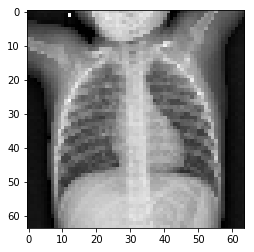

In [11]:
plt.imshow(Train[1][0]/255.)

Se desea observar la cantidad de imagenes que hay de pacientes sanos y la cantidad de imagenes que hay de pacientes enfermos

In [12]:
len(contenido_iNT),len(contenido_iPT),Train[1340][1],Train[1341][1]

(1342, 3876, 0, 1)

se realiza la conversion a array y normalización de la variables

In [13]:
#random.shuffle(Train)
X_Train=np.stack(np.asarray(Train)[:,0]/255.)
Y_Train=np.stack(np.asarray(Train)[:,1])
X_Test=np.stack(np.asarray(Test)[:,0]/255.)
Y_Test=np.stack(np.asarray(Test)[:,1])
print X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

(5216, 64, 64, 3) (5216,) (624, 64, 64, 3) (624,)


In [14]:
Y_Train

array([0, 0, 0, ..., 1, 1, 1])

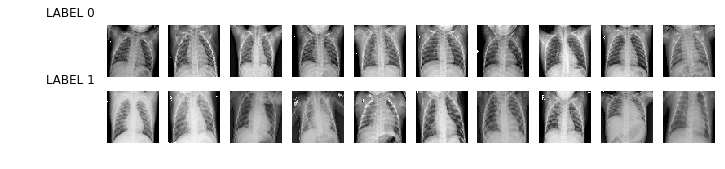

In [15]:
mlutils.show_labeled_image_mosaic(X_Train, Y_Train)

In [16]:
np.max(X_Train[1,:,:,:])

1.0

# Diseño y entrenamiento del modelo de CNN

In [17]:
def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [18]:
def get_conv_model(num_classes, img_size=32, compile=True):
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    print "using",num_classes,"classes"
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(96,(11,11), activation="relu", padding="SAME")(inputs)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(60,(11,11), activation="relu", padding="SAME")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy',precision_m])
    return model

In [19]:
def get_conv_model_b(num_classes, img_size=32, compile=True):
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    print "using",num_classes,"classes"
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(15,(5,5), activation="relu", padding="SAME")(inputs)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(60,(5,5), activation="relu", padding="SAME")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy',precision_m])
    return model

In [20]:
def train(model, batch_size, epochs, model_name=""):
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/"+model_name+"_"+"{}".format(time()))
    model.reset_states()
    model.fit(X_Train, Y_Train,epochs=epochs, callbacks=[tensorboard],
              batch_size=batch_size,
              validation_data=(X_Test, Y_Test))
    metrics = model.evaluate(X_Test, Y_Test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [21]:
model=get_conv_model(num_classes=2, img_size=64, compile=True)
model.summary()

using 2 classes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 60)        697020    
_________________________________________________________________
flatten (Flatten)            (None, 61440)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                983056    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0    

In [22]:
train(model, batch_size=32, epochs=2, model_name="")

Train on 5216 samples, validate on 624 samples
Epoch 1/2
5216/5216 [==============================] - 564s 108ms/step - loss: 0.4907 - acc: 0.7421 - precision_m: 0.7429 - val_loss: 0.5376 - val_acc: 0.7035 - val_precision_m: 0.6250
Epoch 2/2
624/624 [==============================] - 24s 39ms/step


{'acc': 0.8653846153846154, 'loss': 0.39532453700517994, 'precision_m': 0.625}

Normalized confusion matrix
[[0.85470085 0.14529915]
 [0.12820513 0.87179487]]


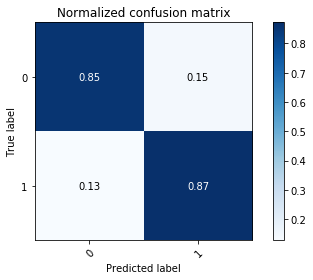

In [24]:
test_preds = model.predict(X_Test).argmax(axis=1)
mlutils.plot_confusion_matrix(Y_Test, test_preds, classes=np.r_[0,1], normalize=True)

Se muestran los kernel de la primera capa despues de entrenarse

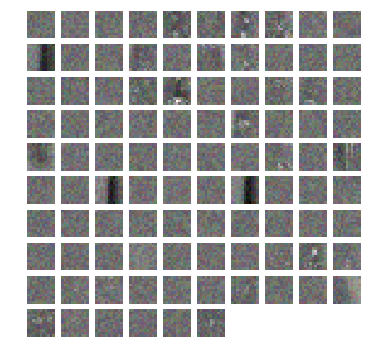

In [25]:
w = model.get_weights()
w_in=w[0]
mlutils.display_imgs(w[0])

Se evalua el segundo modelo, con tamanio de filtro pequenio en comparacion con la ejecucion anterior

In [26]:
model_b=get_conv_model_b(num_classes=2, img_size=64, compile=True)
model_b.summary()

using 2 classes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 15)        1140      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 60)        22560     
_________________________________________________________________
flatten (Flatten)            (None, 61440)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                983056    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0    

In [27]:
train(model_b, batch_size=32, epochs=2, model_name="")

Train on 5216 samples, validate on 624 samples
Epoch 1/2
5216/5216 [==============================] - 41s 8ms/step - loss: 0.3228 - acc: 0.8474 - precision_m: 0.7429 - val_loss: 0.7856 - val_acc: 0.7596 - val_precision_m: 0.6250
Epoch 2/2
624/624 [==============================] - 1s 2ms/step


{'acc': 0.8189102564102564, 'loss': 0.5434627201981269, 'precision_m': 0.625}

Normalized confusion matrix
[[0.56837607 0.43162393]
 [0.03076923 0.96923077]]


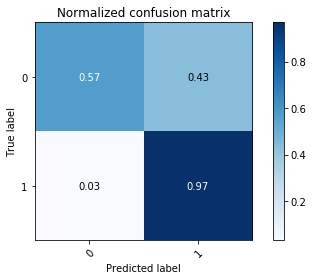

In [29]:
test_preds_b = model_b.predict(X_Test).argmax(axis=1)
mlutils.plot_confusion_matrix(Y_Test, test_preds_b, classes=np.r_[0,1], normalize=True)

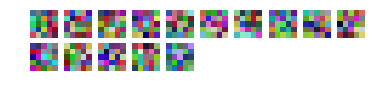

In [30]:
wb = model_b.get_weights()
wb_in=wb[0]
mlutils.display_imgs(wb[0])

# Transfer learning

Se quiere realizar transfer learning de ALEX_NET, ya que algunos de los kernel siguen patrones que pueden mejorar la clasificación

In [31]:
alex_N= pickle.load(bz2.BZ2File("data/alexnet_conv1_conv2.pklz", "r"))

In [32]:
W0_A=alex_N["conv1"][0]

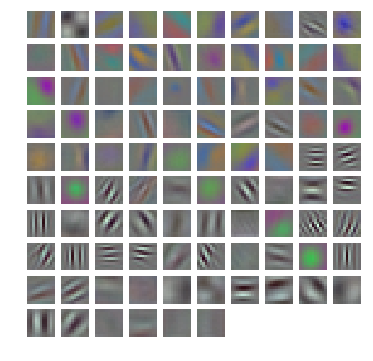

In [33]:
mlutils.display_imgs(W0_A)

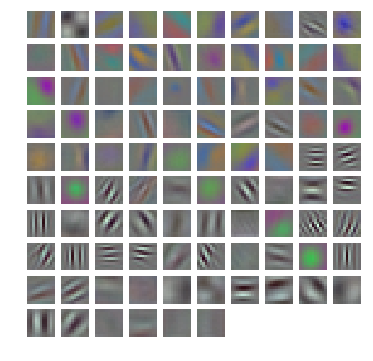

In [34]:
w[0]=W0_A
mlutils.display_imgs(w[0])

In [35]:
train(model, batch_size=32, epochs=2, model_name="")

Train on 5216 samples, validate on 624 samples
Epoch 1/2
5216/5216 [==============================] - 34s 7ms/step - loss: 0.1307 - acc: 0.9534 - precision_m: 0.7429 - val_loss: 0.9095 - val_acc: 0.7933 - val_precision_m: 0.6250
Epoch 2/2
624/624 [==============================] - 1s 2ms/step


{'acc': 0.7724358974358975, 'loss': 0.9133390579551744, 'precision_m': 0.625}

Normalized confusion matrix
[[0.3974359 0.6025641]
 [0.0025641 0.9974359]]


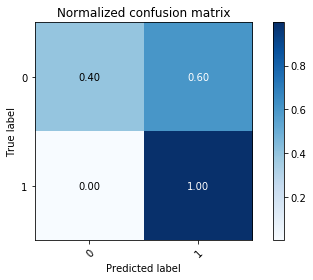

In [36]:
test_preds = model.predict(X_Test).argmax(axis=1)
mlutils.plot_confusion_matrix(Y_Test, test_preds, classes=np.r_[0,1], normalize=True)

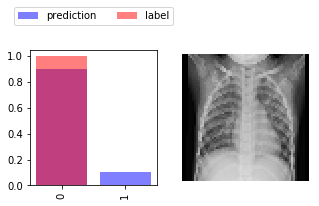

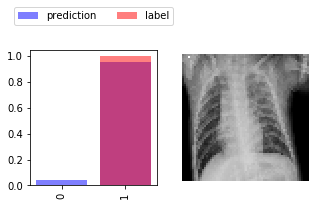

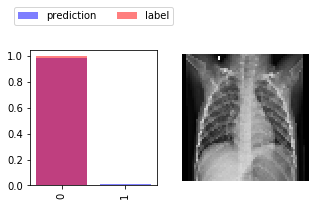

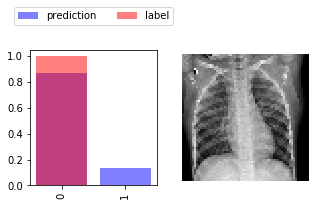

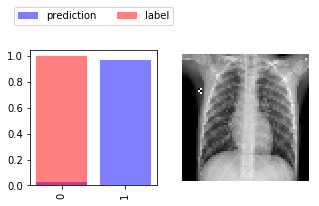

In [176]:
idxs = np.random.permutation(len(X_Test))[:5]
preds = model.predict(X_Test[idxs])
mlutils.show_preds(X_Test[idxs],Y_Test[idxs], preds)

Se ejecuta para la el modelo b, cuya arquitectura tiene filtros de menor tamanio

In [37]:
train(model_b, batch_size=32, epochs=2, model_name="")

Train on 5216 samples, validate on 624 samples
Epoch 1/2
5216/5216 [==============================] - 36s 7ms/step - loss: 0.0996 - acc: 0.9712 - precision_m: 0.7429 - val_loss: 1.2031 - val_acc: 0.7500 - val_precision_m: 0.6250
Epoch 2/2
624/624 [==============================] - 1s 2ms/step


{'acc': 0.8141025641025641, 'loss': 0.7848559687009606, 'precision_m': 0.625}

Normalized confusion matrix
[[0.55555556 0.44444444]
 [0.03076923 0.96923077]]


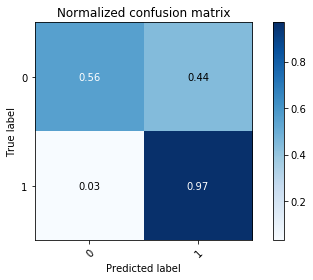

In [39]:
test_preds_b = model_b.predict(X_Test).argmax(axis=1)
mlutils.plot_confusion_matrix(Y_Test, test_preds_b, classes=np.r_[0,1], normalize=True)

Se utilizan las mismas imagenes tomadas aleatoriamente y se evalua la prediccion

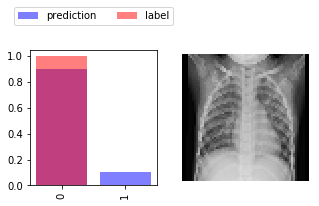

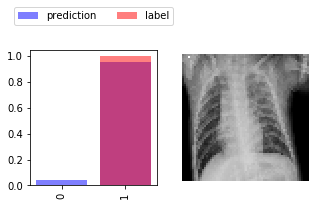

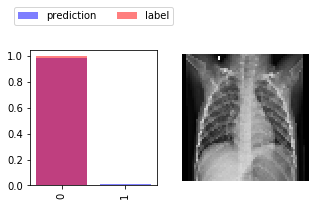

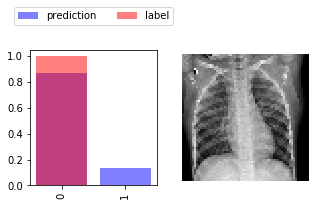

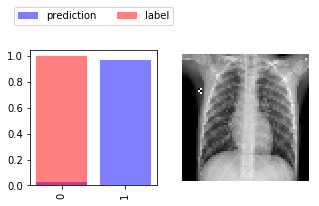

In [177]:
#idxs = np.random.permutation(len(X_Test))[:5]
preds_b = model_b.predict(X_Test[idxs])
mlutils.show_preds(X_Test[idxs],Y_Test[idxs], preds_b)